## Logistic Regression Basics

This is a classification algorithm.

###### Basic Comparison
- Linear Regression
    - Output: numeric value given inputs
- Logistic Regression
    - Output: probability [0, 1] given input belonging to a class
    - Logistic regression is an extension of linear regression, with additional
        - Softmax function
        - Cross entropy function instead of MSE function
    



###### Logistic Function g()
- Two-class logistic regression

###### Softmax Function g()
- Multi-class logistic regression
- Generalization of logistic fuction

###### Cross Entropy Function D()
- D(S, L)=LlogS - (1-L)log(1-S)
    - S = g(y) = g(ax+b)
    - L = label (0 or 1)
    
###### Cross Entropy Loss (L)
- Goal: Minimizing Cross Entropy Loss



###### Watch video 22. Linear Regression Problems 
### ***Watch video 23. Logistic Regression In-depth to understand the concept better

###### Steps:
- Step 1: Load dataset
- Step 2: Make dataset iterable
- Step 3: Create model class
- Step 4: Instantiate model class
- Step 5: Instantiate loss class
- Step 6: Instantiate optimizer class
- Step 7: Train model

## Loading MNIST Train Dataset 

In [48]:
import torch            ## for creating tensors
import torch.nn as nn   ## for modeling
import torchvision.transforms as transforms    ## make data iterable
import torchvision.datasets as dsets           ## make data iterable


from torch.autograd import Variable  ## make variable for enable gradients
import pandas as pd


###### Data loading
- transforming to tensor

In [49]:
train_df = dsets.MNIST(root='./data',
                      train=True,
                      transform=transforms.ToTensor(),
                      download=True)


In [50]:
print(type(train_df))
len(train_df)

<class 'torchvision.datasets.mnist.MNIST'>


60000

In [51]:
train_df[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [52]:
type(train_df[0]) ## first row

tuple

In [53]:
## Input matrix
## This is actually the feature
type(train_df[0][0]) ## 1st element in 1st row

torch.Tensor

In [54]:
## Label
type(train_df[0][1]) ## 2nd element in 1st row

int

In [55]:
train_df[0][0].size()

torch.Size([1, 28, 28])

In [56]:
train_df[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [57]:
train_df[0][1]

5

In [58]:
train_df[2][1]

4

## Displaying MNIST Dataset

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [60]:
## coverting torch obj. to numpy obj.
train_df[0][0].numpy().shape

(1, 28, 28)

In [61]:
img = train_df[0][0].numpy().reshape(28, 28)

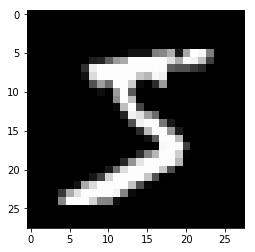

In [62]:
plt.imshow(img, cmap='gray')

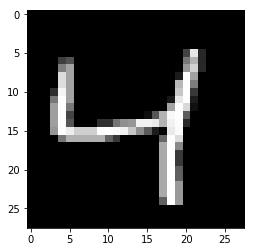

In [63]:
img = train_df[2][0].numpy().reshape(28, 28)
plt.imshow(img, cmap='gray')

In [64]:
train_df[2][1]

4

## Step 1: Loading MNIST Test Dataset

In [65]:
test_df = dsets.MNIST(root='./data',
                      train=False,
                      transform=transforms.ToTensor(),
                      download=True)

In [66]:
len(test_df)

10000

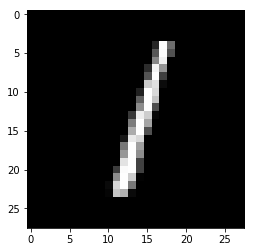

In [67]:
img = test_df[2][0].numpy().reshape(28, 28)
plt.imshow(img, cmap='gray')

In [68]:
test_df[2][1]

1

## Step 2: Make Dataset Iterable

- **Aim:** make the dataset iterable
- **total data:** 60000
- **mini-batch:** 100
    - Number of examples in 1 iteration
    - Passing 100 images instead of passing 1 image
    - This is for efficiency purposes
- **iterations:** 3000
    - 1 iteration: one mini-batch forward & backward pass
    - forward pass: 
        - passing 100 images
        - get the predictions
    - backward pass:
        - get the gradients
        - update the parameters
- **epochs:** 
    - 1 epoch: running through the whole dataset(60000) once
    - 5 epochs: running through the whole dataset(60000) 5 times
    - $epochs = iterations \div \frac{totaldata}{mini-batch} = 3000 \div \frac{60000}{100} = 5$

In [69]:
len(train_df)

60000

In [70]:
batch_size = 100
n_iters = 3000

n_epochs = int(n_iters / (len(train_df) / batch_size))
n_epochs

5

### Create Iterable Object: Training Dataset

In [71]:
train_loader = torch.utils.data.DataLoader(dataset=train_df,
                                          batch_size=batch_size,
                                          shuffle=True)

### Check Iterability

In [72]:
import collections


isinstance(train_loader, collections.Iterable)

True

### Create Iterable Object: Test Dataset

In [73]:
test_loader = torch.utils.data.DataLoader(dataset=test_df,
                                          batch_size=batch_size,
                                          shuffle=False)

isinstance(test_loader, collections.Iterable)

True

### Main aim: Iterate Through Dataset

In [74]:
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))

img_list = [img_1, img_2]


for img in img_list:
    print(img.shape)

(28, 28)
(28, 28)


## Step 3: Building Model

In [75]:
# Same as linear regression!! :D
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

## Step 4: Instantiate Model Class

In [110]:
train_df[0][0].size()

torch.Size([1, 28, 28])

In [111]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

## Step 5: Instantiate Loss Class
- Logistic Regression
    - Cross Entropy Function
    - Output is probability of each specified prediction
 
- Linear Regression
    - Mean Squared Error Function
    - Output is value prediction

In [78]:
criterion = nn.CrossEntropyLoss()


###### What happens in nn.CrossEntropyLoss()
- Computes softmax (logistic/softmax function)
- Computes cross entropy

## Step 6: Instantiate Optimizer Class
- parameters = parameters - learning_rate * parameters_gradients
- **At every iteration, we update our model's parameters**


###### What is the purpose fo the optimizer class
- Update the model's parameter at every iteration
- So that, we can get a better model to do the predictions

In [79]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Parameters In-Depth
- For more clarification watch the video no 24 (20-30min)

In [80]:
print(model.parameters())

print(len(list(model.parameters())))


# y = Ax + b
# This is A or Alpha
print(list(model.parameters())[0].size())


# y = Ax + b
# This is B or Bias
print(list(model.parameters())[1].size())


<generator object Module.parameters at 0x12140bed0>
2
torch.Size([10, 784])
torch.Size([10])


## Step 7: Train Model

In [97]:
iter = 0

for epoch in range(n_epochs): ## this loop will go through all 60,000 images 5 times
    for idx, (images, labels) in enumerate(train_loader): ## this loop will go through all 60,000 images once
        # Load images as Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients w.r.t. parameter
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        outputs = model(images)
        
        # Calcultae Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        #Calculate gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter%500==0:
            # Calculate accuracy
            correct = 0
            total = 0
            
            # Iterate through the test dataset
            for images, labels in test_loader:
                
                # Load images to a Torch Variable
                images = Variable(images.view(-1, 28*28))
                
                # Forward pass only the to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of lables
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            # Print loss
            print('Iteration: {}. Loss: {}. Accuracy: {}.'.format(iter, loss.data, accuracy))
                
                
        
        

Iteration: 500. Loss: 1.848568081855774. Accuracy: 67.
Iteration: 1000. Loss: 1.6495128870010376. Accuracy: 74.
Iteration: 1500. Loss: 1.3659979104995728. Accuracy: 78.
Iteration: 2000. Loss: 1.2253953218460083. Accuracy: 80.
Iteration: 2500. Loss: 1.1608725786209106. Accuracy: 81.
Iteration: 3000. Loss: 1.0317223072052002. Accuracy: 82.


###### Break Down Accuracy Calculation

In [108]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    if iter_test==1:
        print('Outputs')
        print(outputs)

Outputs
tensor([[-3.9149e-01, -1.0796e+00, -4.6823e-01, -3.3329e-01,  1.1494e-01,
         -2.2923e-01, -1.3685e+00,  2.8098e+00, -6.9628e-02,  9.8259e-01],
        [ 3.4675e-01,  6.2777e-02,  1.7298e+00,  1.0837e+00, -1.8653e+00,
          7.9923e-01,  1.0147e+00, -1.8861e+00,  5.1618e-01, -1.5674e+00],
        [-9.7693e-01,  2.2633e+00,  1.4710e-01, -1.5660e-02, -8.6012e-01,
         -3.0272e-01, -1.5734e-01, -1.8561e-01,  8.9228e-02, -3.1040e-01],
        [ 2.7756e+00, -2.3442e+00, -1.1371e-01, -4.0263e-01, -8.7945e-01,
          6.8145e-01,  9.4555e-01,  2.6862e-01, -4.4036e-01, -3.3591e-01],
        [-7.2493e-02, -1.9168e+00,  1.8537e-01, -7.1404e-01,  1.6804e+00,
         -3.8898e-01,  1.5236e-01,  4.5282e-01, -1.1116e-01,  8.3815e-01],
        [-1.3487e+00,  2.8005e+00,  5.7745e-02,  1.0180e-01, -8.4645e-01,
         -3.7220e-01, -6.3281e-01, -5.7424e-02,  4.1136e-01, -1.5824e-01],
        [-1.2969e+00, -1.1406e+00, -6.6221e-01,  9.2530e-02,  1.5105e+00,
          3.4380e-01, -7

In [99]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    if iter_test==1:
        print('Outputs')
        print(outputs.size())

Outputs
torch.Size([100, 10])


In [100]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    if iter_test==1:
        print('Outputs')
        print(outputs[0, :])

Outputs
tensor([-0.3915, -1.0796, -0.4682, -0.3333,  0.1149, -0.2292, -1.3685,  2.8098,
        -0.0696,  0.9826], grad_fn=<SliceBackward>)


In [101]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test==1:
        print('Prediction')
        print(predicted.size())
    

Prediction
torch.Size([100])


In [102]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test==1:
        print('Prediction')
        print(predicted[0])
        
        print('Label Size')
        print(labels.size())
        
        print('Label for Image 0')
        print(labels[0])

Prediction
tensor(7)
Label Size
torch.Size([100])
Label for Image 0
tensor(7)


In [109]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test==1:
        print('Prediction')
        print(predicted[1])
        
        print('Label Size')
        print(labels.size())
        
        print('Label for Image 0')
        print(labels[1])

Prediction
tensor(2)
Label Size
torch.Size([100])
Label for Image 0
tensor(2)


In [105]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = Variable(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
     # Total number of lables
    total += labels.size(0)

    # Total correct predictions
    correct += (predicted == labels).sum()
                
accuracy = 100 * correct / total
print(accuracy)

tensor(82)


###### Explaining .sum() python built-in function

In [106]:
# correct += (predicted == labels).sum()

a = np.ones((10))
b = np.ones((10))

print(a)
print(b)

print(a==b)

print((a==b).sum())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ True  True  True  True  True  True  True  True  True  True]
10


###### Saving model

In [107]:
save_model = False

if save_model is True:
    torch.save(model.state_dict(), 'logistic_model.pkl')